# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

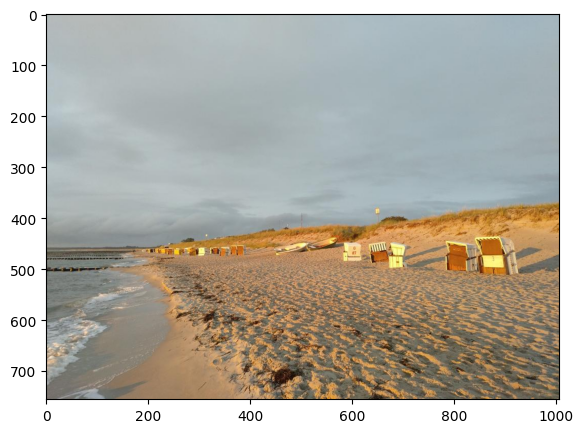

In [2]:
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x7f2f39f2f500>)

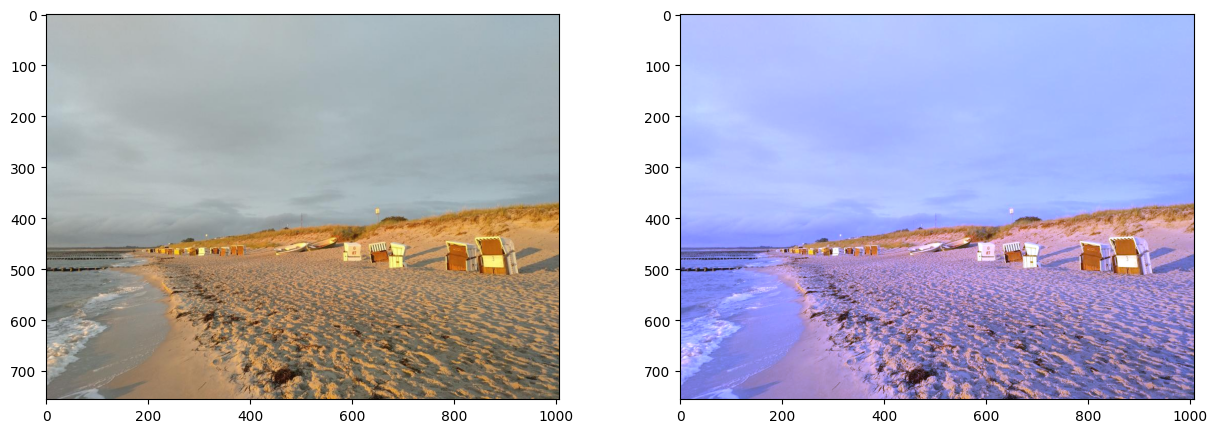

In [3]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: title={'center': 'Gray world'}>,
 Text(0.5, 1.0, 'Gray world'))

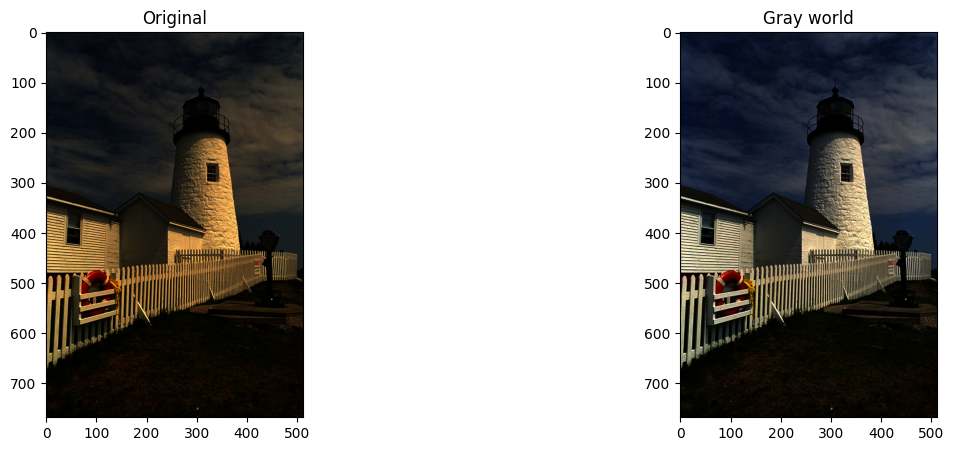

In [4]:
# Load your image
img = cv2.imread('../data/dark.png')

# Compute the mean values for all three colour channels (red, green, blue)
mean_b, mean_g, mean_r, mean_alpha = cv2.mean(img) 

# Compute the coefficients kr, kg, kb
# To find all coefficients we fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_b, mean_g, mean_r)

coefficients = np.array([
    max_mean / mean_r, # for red 
    max_mean / mean_g, # for green
    max_mean / mean_b  # for blue
], dtype=np.float32)
    
# Apply color balancing and generate the balanced image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
balanced = img * coefficients

# Gray world does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Gray world')

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: title={'center': 'Scale-by-max'}>,
 Text(0.5, 1.0, 'Scale-by-max'))

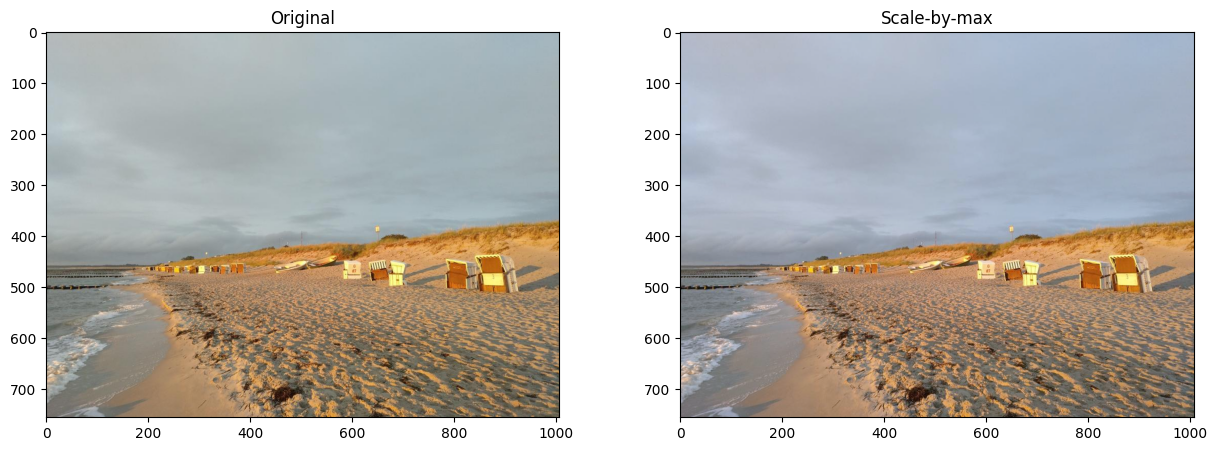

In [5]:
# Load your image
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:,:,0]) 
max_g = np.max(img[:,:,1]) 
max_b = np.max(img[:,:,2]) 

# Apply scale-by-max balancing and generate the balanced image
coefficients = np.array([
    255 / max_r, 
    255 / max_g,
    255 / max_b
], dtype=np.float32)
balanced = img * coefficients

# Clip image
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Scale-by-max')